# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 17.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
470497,0.0879,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0024,0.0024,0,0,0,0
305780,0.1807,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0952,0.0024,0.0024,4,0,7,0
292367,0.1392,0.0024,0.2173,0.7129,0.0488,0.0024,0.0513,0.1904,0.0098,0.2588,0,0,0,0
406357,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1904,0.0830,0.0024,0.2344,0,0,0,0
302458,0.1392,0.0146,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473988 entries, 0 to 473987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          473988 non-null  float64
 1   Emg2          473988 non-null  float64
 2   Emg3          473988 non-null  float64
 3   Emg4          473988 non-null  float64
 4   Emg5          473988 non-null  float64
 5   Emg6          473988 non-null  float64
 6   Emg7          473988 non-null  float64
 7   Emg8          473988 non-null  float64
 8   Emg9          473988 non-null  float64
 9   Emg10         473988 non-null  float64
 10  repetition    473988 non-null  int64  
 11  rerepetition  473988 non-null  int64  
 12  stimulus      473988 non-null  int64  
 13  restimulus    473988 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.6 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000,473988.000000
mean,0.237301,0.176670,0.174632,0.053067,0.016055,0.038061,0.259480,0.299283,0.189452,0.211255,3.135710,2.152799,5.556793,4.003823
std,0.385633,0.397342,0.506173,0.206251,0.073030,0.115458,0.551616,0.466489,0.547019,0.427989,3.481578,3.222700,6.570595,6.269613
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.046400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.114700,0.002400,0.002400,0.002400,0.002400,0.002400,0.061000,0.134300,0.002400,0.036600,2.000000,0.000000,3.000000,0.000000
75%,0.297900,0.127000,0.075700,0.002400,0.002400,0.022000,0.261200,0.341800,0.070800,0.227100,6.000000,4.000000,10.000000,7.000000
max,4.660600,4.660600,4.658200,4.658200,3.474100,2.683100,4.660600,4.663100,4.660600,4.658200,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     203806
4      15675
8      15627
7      15627
6      15619
5      15610
12     15602
2      15591
11     15575
9      15571
3      15546
10     15539
1      15500
14     10419
13     10416
17     10410
15     10370
16     10335
21      5221
18      5214
19      5206
23      5175
20      5174
22      5160
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.630031,-0.479029,-0.377762,-0.272453,-0.207267,-0.339694,-0.502125,-0.659874,-0.377283,-0.524279
1,-0.630031,-0.479029,-0.377762,-0.272453,-0.207267,-0.339694,-0.502125,-0.659874,-0.377283,-0.524279
2,-0.630031,-0.479029,-0.377762,-0.272453,-0.207267,-0.339694,-0.502125,-0.654913,-0.377283,-0.524279
3,-0.630031,-0.479029,-0.377762,-0.272453,-0.207267,-0.339694,-0.502125,-0.659874,-0.377283,-0.524279
4,-0.630031,-0.479029,-0.377762,-0.272453,-0.207267,-0.339694,-0.502125,-0.659874,-0.377283,-0.524279
...,...,...,...,...,...,...,...,...,...,...
387899,-0.518673,-0.479029,-0.377762,-0.272453,-0.207267,-0.011212,0.459327,-0.073759,-0.377283,0.823149
387900,-0.460114,-0.479029,-0.377762,-0.272453,-0.207267,-0.068993,0.365718,-0.126934,-0.377283,0.691640
387901,-0.448354,-0.479029,-0.377762,-0.272453,-0.207267,-0.126774,0.284123,-0.117212,-0.377283,0.681076
387902,-0.442354,-0.479029,-0.377762,-0.272453,-0.207267,-0.165559,0.263766,-0.059076,-0.377283,0.865405


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
77/77 [==============================] - 3s 27ms/step - loss: 1.3501 - accuracy: 0.6525 - val_loss: 0.9671 - val_accuracy: 0.7408
Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8941 - accuracy: 0.7584 - val_loss: 0.7934 - val_accuracy: 0.7841
Epoch 3/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7697 - accuracy: 0.7879 - val_loss: 0.7100 - val_accuracy: 0.8045
Epoch 4/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7019 - accuracy: 0.8050 - val_loss: 0.6510 - val_accuracy: 0.8183
Epoch 5/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6515 - accuracy: 0.8170 - val_loss: 0.6158 - val_accuracy: 0.8277
Epoch 6/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6132 - accuracy: 0.8279 - val_loss: 0.5936 - val_accuracy: 0.8338
Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 0.5782 - accuracy: 0.8368 - val_loss: 0.5567 - val_accuracy: 0.8420
Epoch 

77/77 [==============================] - 2s 26ms/step - loss: 0.2203 - accuracy: 0.9373 - val_loss: 0.2491 - val_accuracy: 0.9312
Epoch 59/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2152 - accuracy: 0.9390 - val_loss: 0.2515 - val_accuracy: 0.9303
Epoch 60/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2135 - accuracy: 0.9389 - val_loss: 0.2387 - val_accuracy: 0.9342
Epoch 61/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2114 - accuracy: 0.9402 - val_loss: 0.2380 - val_accuracy: 0.9339
Epoch 62/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2099 - accuracy: 0.9405 - val_loss: 0.2455 - val_accuracy: 0.9325
Epoch 63/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2121 - accuracy: 0.9400 - val_loss: 0.2383 - val_accuracy: 0.9333
Epoch 64/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2082 - accuracy: 0.9407 - val_loss: 0.2432 - val_accuracy: 0.9329
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

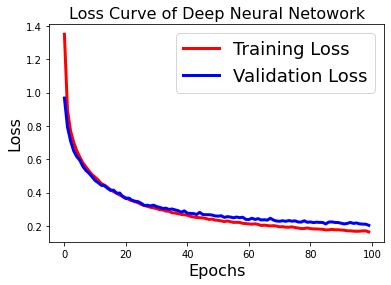

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

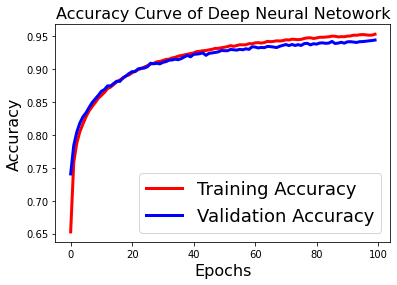

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([0, 9, 7, ..., 0, 0, 0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

11

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.45224990654928


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     40602
           1       0.94      0.93      0.94      1971
           2       0.94      0.93      0.93      1947
           3       0.95      0.88      0.92      2180
           4       0.96      0.93      0.94      2106
           5       0.96      0.94      0.95      1946
           6       0.97      0.92      0.94      1892
           7       0.93      0.83      0.88      1942
           8       0.93      0.91      0.92      2024
           9       0.93      0.90      0.92      2113
          10       0.94      0.88      0.91      1882
          11       0.96      0.92      0.94      2151
          12       0.96      0.87      0.91      2177
          13       0.94      0.85      0.89      1454
          14       0.90      0.83      0.86      1529
          15       0.90      0.85      0.87      1481
          16       0.92      0.88      0.90      1555
 

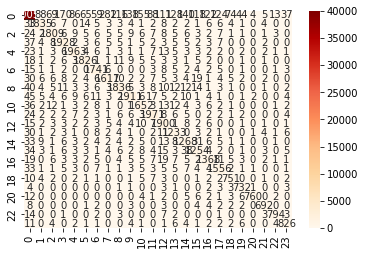

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.48190923035279254
MSE: 5.841494695866256
RMSE: 2.416918429708842


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9443504970764215
Recall Score :  0.9445224990654928
f1_score :  0.943864334813021
